# Climate Analysis
Module 9: Surf's Up with Advanced Data Storage and Retrieval

## 9.1.3 Import Dependencies

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

## 9.1.5 Getting Started with SQLAlchemy
https://courses.bootcampspot.com/courses/1177/pages/9-dot-1-5-getting-started-with-sqlalchemy?module_item_id=356151

### SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

### SQLAlchemy Create Engine
Greg Note 1 - In order to connect to our SQLite database, we need to use the create_engine() function. This function doesn't actually connect to our database; it just prepares the database file to be connected to later on.

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

### SQLAlchemy Automap Base
Greg Note 2 - Automap Base creates a base class for an automap schema in SQLAlchemy. Basically, it sets up a foundation for us to build on in SQLAlchemy, and by adding it to our code, it will help the rest of our code to function properly.

In [6]:
# reflect an existing database into a new model
Base = automap_base()

### SQLAlchemy Reflect Tables
Greg Note 3 - When we reflect tables, we create classes that help keep our code separate.

In [7]:
# reflect the tables
Base.prepare(engine, reflect=True)

### View Classes Found by Automap

Greg Note 4 - Confirm that the Automap was able to find all of the data in the SQLite database.

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

### Save References to Each Table
Greg Note 5 - Since it can be rather cumbersome to type Base.classes every time we want to reference the measurement or station classes, we can give the classes new variable names.

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

### Create Session Link to the Database
Greg Note 6 - First, we'll use an SQLAlchemy Session to query our database. Our session essentially allows us to query for data.

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

## 9.2.1 Retrieve the Precipitation Data
https://courses.bootcampspot.com/courses/1177/pages/9-dot-2-1-retrieve-the-precipitation-data?module_item_id=356157

### Find the Date One Year Ago
Greg Note 7 - We'll be creating a variable called prev_year and using the datetime dependency that we imported previously.

In [11]:
prev_year = dt.date(2017, 8, 23)
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

Greg Note 8 - Create a variable to store the results of the query we'll write. We will reference the Measurement table using Measurement.date and Measurement.prcp.

In [12]:
results = []
results = session.query(Measurement.date, Measurement.prcp)

Greg Note 9 - This will print everything that is returned in the query.

In [13]:
print(results.all())

[('2010-01-01', 0.08), ('2010-01-02', 0.0), ('2010-01-03', 0.0), ('2010-01-04', 0.0), ('2010-01-06', None), ('2010-01-07', 0.06), ('2010-01-08', 0.0), ('2010-01-09', 0.0), ('2010-01-10', 0.0), ('2010-01-11', 0.01), ('2010-01-12', 0.0), ('2010-01-14', 0.0), ('2010-01-15', 0.0), ('2010-01-16', 0.0), ('2010-01-17', 0.0), ('2010-01-18', 0.0), ('2010-01-19', 0.0), ('2010-01-20', 0.0), ('2010-01-21', 0.0), ('2010-01-22', 0.0), ('2010-01-23', 0.0), ('2010-01-24', 0.01), ('2010-01-25', 0.0), ('2010-01-26', 0.04), ('2010-01-27', 0.12), ('2010-01-28', 0.0), ('2010-01-30', None), ('2010-01-31', 0.03), ('2010-02-01', 0.01), ('2010-02-03', None), ('2010-02-04', 0.01), ('2010-02-05', 0.0), ('2010-02-06', 0.0), ('2010-02-07', 0.0), ('2010-02-08', 0.0), ('2010-02-09', 0.0), ('2010-02-11', 0.0), ('2010-02-12', 0.02), ('2010-02-13', 0.01), ('2010-02-14', 0.0), ('2010-02-15', 0.0), ('2010-02-16', 0.0), ('2010-02-17', 0.0), ('2010-02-19', None), ('2010-02-20', 0.03), ('2010-02-21', 0.0), ('2010-02-22', 0.

Greg Note 10 - Since we only want to see the most recent data, we need to filter out all of the data that is older than a year from the last record date.

In [14]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year)

Greg Note 12 - Add a function that extracts all of the results from our query and put them in a list.

In [15]:
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

## 9.2.2 Save Query Results
https://courses.bootcampspot.com/courses/1177/pages/9-dot-2-2-save-query-results?module_item_id=356160

In order to save our results as a DataFrame, we need to provide our results variable as one parameter and specify the column names as our second parameter.

In [16]:
df = pd.DataFrame(results, columns=['date','precipitation'])

### Use the set_index() Function
The first column is auto-generated and contains the row number. However, we want the index column to be the date column, so we'll need to get rid of those row numbers.

In [17]:
df.set_index(df['date'], inplace=True)
print(df)

# This will allow us to print the DataFrame without the index. Add the following to your code:
print(df.to_string(index=False))

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]
      date  precipitation
2016-08-23           0.00
2016-08-24           0.08
2016-08-25           0.08
2016-08-26           0.00
2016-08-27           0.00
2016-08-28           0.01
2016-08-29           0.00
2016-08-30           0.00
2016-08-31           0.13
2016-09-01           0.00
2016-09-02           0.00
2016-09-03           0.00
2016-09-04           0.03
2016-09-05            NaN
2016-09-06            NaN
2016-09-07           0.05
2016-09-08           0.00
2016-09-09   

### 9.2.3 Sort the DataFrame
https://courses.bootcampspot.com/courses/1177/pages/9-dot-2-3-sort-the-dataframe?module_item_id=356164 <br>

In order to save our results as a DataFrame, we need to provide our results variable as one parameter and specify the column names as our second parameter. 

In [18]:
df = df.sort_index()
print(df.to_string(index=False))

      date  precipitation
2016-08-23           0.00
2016-08-23            NaN
2016-08-23           1.79
2016-08-23           0.05
2016-08-23           0.15
2016-08-23           0.70
2016-08-23           0.02
2016-08-24           0.08
2016-08-24           2.15
2016-08-24           2.28
2016-08-24            NaN
2016-08-24           1.45
2016-08-24           1.22
2016-08-24           2.15
2016-08-25           0.08
2016-08-25           0.00
2016-08-25           0.21
2016-08-25           0.06
2016-08-25           0.00
2016-08-25           0.11
2016-08-25           0.08
2016-08-26           0.03
2016-08-26           0.01
2016-08-26           0.00
2016-08-26           0.04
2016-08-26           0.02
2016-08-26           0.00
2016-08-27           0.18
2016-08-27           0.12
2016-08-27           0.00
2016-08-27           0.00
2016-08-27           0.02
2016-08-27            NaN
2016-08-28           0.60
2016-08-28           0.14
2016-08-28           0.01
2016-08-28           0.14
2016-08-28  

### 9.2.4 Plot the Data
Greg you are here <br>
https://courses.bootcampspot.com/courses/1177/pages/9-dot-2-4-plot-the-data?module_item_id=356168

<AxesSubplot:xlabel='date'>

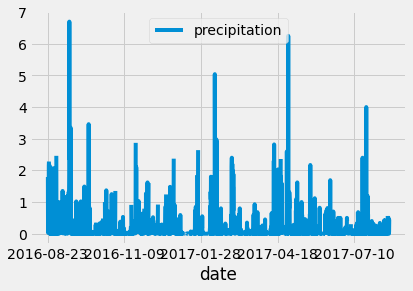

In [19]:
df.plot()

Pandas helps us with these calculations. We'll use the describe() function to calculate the mean, minimum, maximum, standard deviation, and percentiles

### 9.2.5 Generate the Summary

In [27]:
df.describe()

precipitation
count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000

### 9.3.1 Find the Number of Stations
We need to write a query to get the number of stations in our dataset. We'll use our session that we created earlier to query our database.

In [28]:
session.query(func.count(Station.station)).all()

[(9,)]

### 9.3.2 Determine the Most Active Stations
We want to group the data by the station name, and then order by the count for each station in descending order. This function will order our results in the order that we specify, in this case, descending order.  Now we need to add the .all() function here as well. This will return all of the results of our query. 

In [33]:
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

### 9.3.3 Find Low, High, and Average Temperatures

With the minimum, maximum, and average in our query, we now need to add one filter. We'll be filtering out everything but the station W. Avy is interested in. If you look at the outcome of the previous query, you can see that the most active station is USC00519281. Finally, add the .all() function to return our results as a list.

In [35]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

### 9.3.4 Plot the Highest Number of Observations
#### Create a Query for the Temperature Observations
We want to pull Measurement.tobs in order to get our total observations count.  We need to apply another filter to consider only the most recent year. 

In [39]:
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

### Convert the Temperature Observation Results to a DataFrame

In [41]:
df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


#### Plot the Temperature Observations
To create the histogram, we need to use the plot() function and the hist() function and add the number of bins as a parameter. 

<AxesSubplot:ylabel='Frequency'>

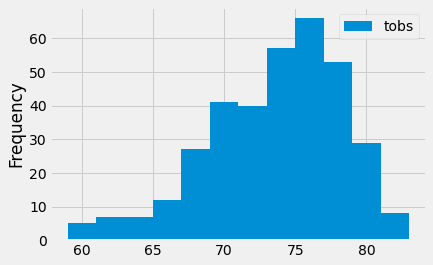

In [44]:
df.plot.hist(bins=12)

Using plt.tight_layout(), we can compress the x-axis labels so that they fit into the box holding our plot.

<AxesSubplot:ylabel='Frequency'>

<Figure size 432x288 with 0 Axes>

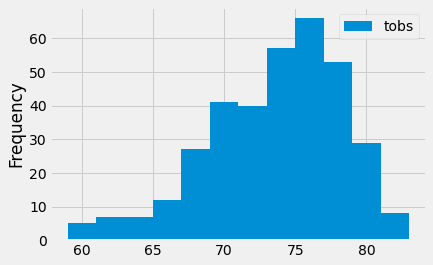

In [45]:
plt.tight_layout()
df.plot.hist(bins=12)

### 9.4.1 Incorporate Flask into Data Analysis
You're now going to add a new tool to your data analysis toolbelt: Flask.

### 9.4.2 Building Flask Routes
### 9.4.3 Set Up Flask and Create a Route
#### Install Flask

In [48]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


Read this section create app.py, activate it in anaconda, and run it at localhost:5000 <br>
https://courses.bootcampspot.com/courses/1177/pages/9-dot-4-3-set-up-flask-and-create-a-route?module_item_id=356209 <br>
See the Python App app.py Hello World <br>
C:\Users\Greg\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Anaconda3 (64-bit)\Anaconda Prompt (PythonData)

## 9.5.2 Create the Welcome Route

In [ ]:
9.5.5
Monthly Temperature Route

# Exploratory Climate Analysis


In [20]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data


In [22]:
# How many stations are available in this dataset?


In [23]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [26]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge